Code for MMB final assignment
Run the code in a python file to get an animation

# Code V1 save for later

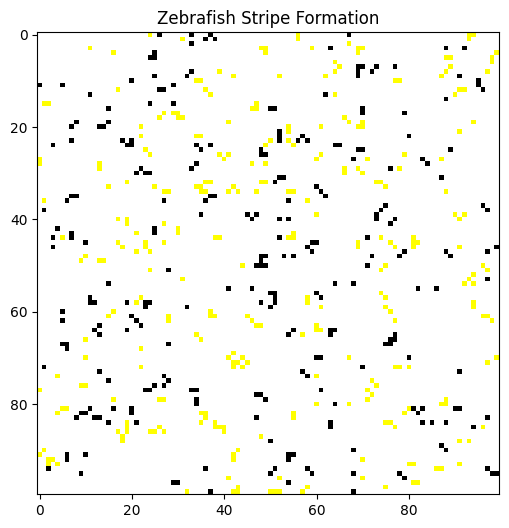

In [7]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.animation as animation

# Constants
GRID_SIZE = (100, 100)  # Grid size (100x100)
MELANOPHORE = 1  # Black stripe cells (melanophores)
XANTHOPHORE = 2  # Yellow interstripe cells (xanthophores)
EMPTY = 0  # Empty cells
STEPS = 100  # Number of simulation steps

# Initialize grid with empty cells
grid = np.zeros(GRID_SIZE, dtype=int)

# Function to initialize cells (randomly place melanophores and xanthophores)
def initialize_cells(grid, num_melanophores=200, num_xanthophores=200):
    for _ in range(num_melanophores):
        x, y = random.randint(0, GRID_SIZE[0]-1), random.randint(0, GRID_SIZE[1]-1)
        grid[x, y] = MELANOPHORE
    for _ in range(num_xanthophores):
        x, y = random.randint(0, GRID_SIZE[0]-1), random.randint(0, GRID_SIZE[1]-1)
        grid[x, y] = XANTHOPHORE
    return grid

# Function to calculate the number of adjacent melanophores and xanthophores
def count_neighbors(grid, x, y):
    melanophores = 0
    xanthophores = 0
    for i in range(x-1, x+2):
        for j in range(y-1, y+2):
            if 0 <= i < GRID_SIZE[0] and 0 <= j < GRID_SIZE[1] and (i != x or j != y):
                if grid[i, j] == MELANOPHORE:
                    melanophores += 1
                elif grid[i, j] == XANTHOPHORE:
                    xanthophores += 1
    return melanophores, xanthophores

# Function to update the grid based on interaction rules
def update_grid(grid):
    new_grid = grid.copy()
    for x in range(GRID_SIZE[0]):
        for y in range(GRID_SIZE[1]):
            melanophores, xanthophores = count_neighbors(grid, x, y)
            
            if grid[x, y] == MELANOPHORE:
                # Melanophores repelling xanthophores
                if xanthophores > melanophores:  # If there are more xanthophores nearby, melanophores may die
                    new_grid[x, y] = EMPTY
            elif grid[x, y] == XANTHOPHORE:
                # Xanthophores repelling melanophores
                if melanophores > xanthophores:  # If there are more melanophores nearby, xanthophores may die
                    new_grid[x, y] = EMPTY
            else:
                # Empty cell differentiation (may become melanophore or xanthophore)
                if melanophores > xanthophores:
                    if random.random() < 0.05:  # Random chance for differentiation into melanophore
                        new_grid[x, y] = MELANOPHORE
                elif xanthophores > melanophores:
                    if random.random() < 0.05:  # Random chance for differentiation into xanthophore
                        new_grid[x, y] = XANTHOPHORE
    return new_grid

# Function to visualize the grid
def plot_grid(grid):
    cmap = colors.ListedColormap(['white', 'black', 'yellow'])
    return plt.imshow(grid, cmap=cmap)

# Initialize grid with cells
grid = initialize_cells(grid)  # Initialize cells

# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(grid, cmap=colors.ListedColormap(['white', 'black', 'yellow']))

# Update function for animation
def update(frame):
    global grid
    grid = update_grid(grid)  # Update grid at each step
    cax.set_array(grid)  # Update the grid visualization
    return [cax]

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=STEPS, interval=200, blit=True)

# Display the animation
plt.title("Zebrafish Stripe Formation")
plt.show()

# Code V2 save for later

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.animation as animation

# Constants
GRID_SIZE = (100, 100)  # Grid size (100x100)
MELANOPHORE = 1  # Black stripe cells (melanophores)
XANTHOPHORE = 2  # Yellow interstripe cells (xanthophores)
EMPTY = 0  # Empty cells
STEPS = 100  # Number of simulation steps

# Length scales for cellular interactions
DMM = 50  # Average distance between melanophores
DXX = 36  # Average distance between xanthophores
DXM = 82  # Average distance between melanophores and xanthophores at stripe/interstripe boundaries

# Initialize grid with empty cells
grid = np.zeros(GRID_SIZE, dtype=int)

def initialize_cells(grid):
    # Top and bottom rows are melanophores with empty spaces between each cell
    grid[0, ::2] = MELANOPHORE  # Set every other cell in the top row to melanophores
    grid[GRID_SIZE[0] - 1, ::2] = MELANOPHORE  # Set every other cell in the bottom row to melanophores
    
    # Middle row is xanthophores
    middle_row = GRID_SIZE[0] // 2
    grid[middle_row, :] = XANTHOPHORE  # Set the middle row to xanthophores
    
    # Rows directly above and below the middle row are melanophores with gaps
    grid[middle_row - 2, ::2] = MELANOPHORE  # Set every other cell in the row above middle row to melanophores
    grid[middle_row + 2, ::2] = MELANOPHORE  # Set every other cell in the row below middle row to melanophores
    
    return grid

# Function to calculate the number of adjacent melanophores and xanthophores
def count_neighbors(grid, x, y):
    melanophores = 0
    xanthophores = 0
    for i in range(x-1, x+2):
        for j in range(y-1, y+2):
            if 0 <= i < GRID_SIZE[0] and 0 <= j < GRID_SIZE[1] and (i != x or j != y):
                if grid[i, j] == MELANOPHORE:
                    melanophores += 1
                elif grid[i, j] == XANTHOPHORE:
                    xanthophores += 1
    return melanophores, xanthophores

# Function to update the grid based on interaction rules
def update_grid(grid):
    new_grid = grid.copy()
    for x in range(GRID_SIZE[0]):
        for y in range(GRID_SIZE[1]):
            melanophores, xanthophores = count_neighbors(grid, x, y)
            
            if grid[x, y] == MELANOPHORE:
                # Melanophores repelling xanthophores
                if xanthophores > melanophores:  # If there are more xanthophores nearby, melanophores may die
                    new_grid[x, y] = EMPTY
            elif grid[x, y] == XANTHOPHORE:
                # Xanthophores repelling melanophores
                if melanophores > xanthophores:  # If there are more melanophores nearby, xanthophores may die
                    new_grid[x, y] = EMPTY
            else:
                # Empty cell differentiation (may become melanophore or xanthophore)
                if melanophores > xanthophores:
                    if random.random() < 0.05:  # Random chance for differentiation into melanophore
                        new_grid[x, y] = MELANOPHORE
                elif xanthophores > melanophores:
                    if random.random() < 0.05:  # Random chance for differentiation into xanthophore
                        new_grid[x, y] = XANTHOPHORE
    return new_grid

# Function to visualize the grid
def plot_grid(grid):
    cmap = colors.ListedColormap(['white', 'black', 'yellow'])
    return plt.imshow(grid, cmap=cmap)

# Initialize grid with cells based on the new initialization function
grid = initialize_cells(grid)  # Initialize cells

# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(grid, cmap=colors.ListedColormap(['white', 'black', 'yellow']))

# Update function for animation
def update(frame):
    global grid
    grid = update_grid(grid)  # Update grid at each step
    cax.set_array(grid)  # Update the grid visualization
    return [cax]

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=STEPS, interval=200, blit=True)

# Display the animation
plt.title("Zebrafish Stripe Formation")
plt.show()

# Code v3 Save for later

In [ ]:
mport numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib.animation as animation

# Constants
GRID_SIZE = (100, 100)  # Grid size (100x100)
MELANOPHORE = 1  # Black stripe cells (melanophores)
XANTHOPHORE = 2  # Yellow interstripe cells (xanthophores)
EMPTY = 0  # Empty cells
STEPS = 100  # Number of simulation steps

# Length scales for cellular interactions
DMM = 50  # Average distance between melanophores
DXX = 36  # Average distance between xanthophores
DXM = 82  # Average distance between melanophores and xanthophores at stripe/interstripe boundaries

# Morse potential parameters (example values)
RMM = 1.0  # Repulsion strength for melanophores
RXX = 1.0  # Repulsion strength for xanthophores
RXM = 1.0  # Repulsion strength for melanophore and xanthophore
AMM = 0.5  # Attraction strength for melanophores
AXX = 0.5  # Attraction strength for xanthophores
AXM = 0.5  # Attraction strength for melanophore and xanthophore

# Initialize grid with empty cells
grid = np.zeros(GRID_SIZE, dtype=int)

def initialize_cells(grid):
    # Top and bottom rows are melanophores with empty spaces between each cell
    grid[0, ::2] = MELANOPHORE  # Set every other cell in the top row to melanophores
    grid[GRID_SIZE[0] - 1, ::2] = MELANOPHORE  # Set every other cell in the bottom row to melanophores
    
    # Middle row is xanthophores
    middle_row = GRID_SIZE[0] // 2
    grid[middle_row, :] = XANTHOPHORE  # Set the middle row to xanthophores
    
    # Rows directly above and below the middle row are melanophores with gaps
    grid[middle_row - 2, ::2] = MELANOPHORE  # Set every other cell in the row above middle row to melanophores
    grid[middle_row + 2, ::2] = MELANOPHORE  # Set every other cell in the row below middle row to melanophores
    
    return grid

# Morse potential function to calculate the interaction between two cells
def morse_potential(x1, y1, x2, y2, type1, type2):
    distance = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    
    if distance == 0:
        return 0  # No interaction if cells are at the same position
    
    # Define the Morse potential parameters based on the cell types
    if type1 == MELANOPHORE and type2 == MELANOPHORE:
        R, A, r, a = RMM, AMM, DMM, DMM
    elif type1 == XANTHOPHORE and type2 == XANTHOPHORE:
        R, A, r, a = RXX, AXX, DXX, DXX
    else:
        R, A, r, a = RXM, AXM, DXM, DXM
    
    # Morse potential formula
    return R * np.exp(-distance / r) - A * np.exp(-distance / a)

# Function to update the grid based on interaction rules
def update_grid(grid):
    new_grid = grid.copy()
    for x in range(GRID_SIZE[0]):
        for y in range(GRID_SIZE[1]):
            if grid[x, y] != EMPTY:
                # Calculate the net force on each cell based on the Morse potential
                force_x = 0
                force_y = 0
                for i in range(GRID_SIZE[0]):
                    for j in range(GRID_SIZE[1]):
                        if (i != x or j != y) and grid[i, j] != EMPTY:
                            potential = morse_potential(x, y, i, j, grid[x, y], grid[i, j])
                            force_x += potential * (i - x) / np.sqrt((i - x)**2 + (j - y)**2)
                            force_y += potential * (j - y) / np.sqrt((i - x)**2 + (j - y)**2)
                
                # Move the cell based on the calculated forces (scaled for simplicity)
                new_x = min(max(0, x + int(force_x * 0.1)), GRID_SIZE[0] - 1)
                new_y = min(max(0, y + int(force_y * 0.1)), GRID_SIZE[1] - 1)
                
                # If the cell moves to a new location, update the grid
                if new_grid[new_x, new_y] == EMPTY:
                    new_grid[new_x, new_y] = grid[x, y]
                    new_grid[x, y] = EMPTY
    return new_grid

# Function to visualize the grid
def plot_grid(grid):
    cmap = colors.ListedColormap(['white', 'black', 'yellow'])
    return plt.imshow(grid, cmap=cmap)

# Initialize grid with cells based on the new initialization function
grid = initialize_cells(grid)  # Initialize cells

# Set up the figure and axis for animation
fig, ax = plt.subplots(figsize=(6, 6))
cax = ax.imshow(grid, cmap=colors.ListedColormap(['white', 'black', 'yellow']))

# Update function for animation
def update(frame):
    global grid
    grid = update_grid(grid)  # Update grid at each step
    cax.set_array(grid)  # Update the grid visualization
    return [cax]

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=STEPS, interval=200, blit=True)

# Display the animation
plt.title("Zebrafish Stripe Formation")
plt.show()